# Sampling Average Approximation (SAA) in Newsvendor

# 1. Stochastic Optimization

Sea $\xi$ un vector aleatorio con medida de probabilidad $\mathbb{P}$, y soporte $\Omega \subset \mathbb{R}^{d}$ y sean $\{\xi^{i}\}_{i=1}^{N}$ iid samples de $\xi$ talque $\mathbb{P}_{N}(\xi=\xi^{i})=\frac{1}{N}$.

## 1.1 Problema original:

\begin{align}
(P) \;
\underset{x \in X}{\text{minimize}}& \; f(x) = \mathbb{E}[F(x, \xi)]\nonumber
\end{align}

$F(x, \xi)$ es la solución de otro problema de optimización. En general $\mathbb{E}[F(x, \xi)]$ es intratable computacionalmente y por tanto se debe apróximar a través de monte carlo, es decir, a través de sampling.

## 1.2. Problema aproximado:

\begin{align}
(\hat{P}_{N}) \;
\underset{x \in X}{\text{minimize}}& \; \hat{f}_{N}(x) = \mathbb{E}_{P_{N}}[F(x, \xi)]=\frac{1}{N}\sum_{i=1}^{N}F(x, \xi^{i})\nonumber
\end{align}

Sea $\delta$ el valor óptimo del problema original y $S$ el conjunto de soluciones óptimas, por otro lado $\hat{\delta}_{N}$ y $\hat{S}_{N}$ el valor óptimo y el conjunto de soluciones óptimas del problema aproximado respectivamente.

## 1.3. Cotas [1]

Se tienen dos cotas para el valor objetivo del problema original:

\begin{equation*}
\forall N \in \mathbb{N}, \; \mathbb{E}[\hat{\delta}_{N}]\leq\delta\leq\mathbb{E}[F(x,\xi)], \; \forall x \in X
\end{equation*}

¿Cómo estimamos las cotas?

### 1.3.1 Cota inferior

Fijar $N$ y resolver $n_{1}$ problemas con $n_{1}<N$, luego obtenemos el conjunto de valores óptimos $\{ \hat{\delta}_{N,i} \}_{i=1}^{n_{1}}$ y $\{ \hat{x}_{N,i} \}_{i=1}^{n_{1}}$soluciones óptimos del problema aproximado. Sea $\bar{\delta}_{N, n_{1}}=\frac{1}{n_{1}}\sum_{i=1}^{n_{1}}\hat{\delta}_{N,i}$ el promedio de la cota inferior y $s_{N, n_{1}}^{2}=\frac{1}{n_{1}(n_{1}-1)}\sum_{i=1}^{n_{1}}(\hat{\delta}_{N,i}-\bar{\delta}_{N, n_{1}})^{2}$ la desviación estándar de la cota inferior. Por teorema central del límite se tiene:

\begin{equation*}
\mathbb{P}(LB=\bar{\delta}_{N, n_{1}}-z_{\alpha}s_{N, n_{1}}\leq \delta)\geq 1-\alpha
\end{equation*}

Donde $z_{\alpha}$ es el valor que asociado a una distribución normal estándar
con una probabilidad acumulada $1-\alpha$, es decir, $\Phi^{-1}(1-\alpha)=z_{\alpha}$. Notar que si se quiere que la cota inferior sea menor que $\delta$ con una alta probabilidad ($\alpha$ pequeño) la estimación sobre LB es menor.

### 1.3.2 Cota superior

Escoger $n_{2}$, sea $\hat{f}_{n_{2}}(x) = \frac{1}{n_{2}}\sum_{j=1}^{n_{2}}F(x, \xi^{j})$ y $s_{n_{2}}^{2}(x)=\frac{1}{n_{2}(n_{2}-1)}\sum_{j=1}^{n_{2}}(F(x, \xi^{j})-\hat{f}_{n_{2}})^{2}$ el promedio y la desviación estándar de las cotas superiores dado un $x$. Por teorema central del límite se tiene:
    
\begin{equation*}
\mathbb{P}(\hat{f}_{n_{2}}(x)+z_{\alpha}s_{n_{2}}(x)\geq \delta)\geq 1- \alpha, \; \forall x \in X
\end{equation*}
    
Sea $\mu_{i} = \hat{f}_{n_{2}}(\hat{x}_{N,i})+z_{\alpha}s_{n_{2}}(\hat{x}_{N,i})$ se tiene que:
    
    
\begin{align}
\mathbb{P}\big( \;
UB=\underset{i =1, \ldots n_{1}}{\text{min}}& \mu_{i} \geq \delta\big)\geq 1- \alpha \nonumber
\end{align}

Notar que si se quiere que la cota superior sea mayor que $\delta$ con una alta probabilidad ($\alpha$ pequeño) la estimación sobre UB es mayor.


### 1.4 Solución epsilon óptimas [2]

Si el problema tiene solución cerrada podemos computar la probabilidad de que el valor objetivo de una solución obtenida por SAA ($f(\hat{x}_{N}=\mathbb{E}[F(x, \xi)]$) con $N$ samples este a $\epsilon>0$ del valor objetivo del problema original ($\delta$), esta probabilidad se puede estimar evaluando las $n_{1}$ soluciones obtenidas por SAA y contando casos favorables versus totales :

\begin{equation*}
\hat{\mathbb{P}}(f(\hat{x}_{N})-\delta \leq \epsilon) = \frac{\sum_{i=1}^{n1}\mathbb{1}_{f(\hat{x}_{N,i})-\delta\leq\epsilon}}{n_{1}} 
\end{equation*}

Notar que $f(\hat{x}_{N})-\delta \geq 0$. En vez de usar $\epsilon$ se utilizará una tolerancia relativa $d$, tal que $\epsilon = -d\delta$ con $d\in[0,1]$.

# 2. News Vendor


## 2. 1 First Stage Problem

\begin{align}
\nonumber
\underset{y}{\text{min}}& \; \mathbb{E}[F(y, \xi)] \\ \nonumber
\textrm{s.t.}\qquad & \; y\geq0\\ \nonumber
\end{align}

El objetivo es minimizar el valor esperado de las pérdidas.
## 2.2 Second Stage Problem

\begin{align}
\nonumber
F(y, \xi) =\underset{x}{\text{min}}& \; -c_{s}x_{s}^{\xi}-c_{d}x_{d}^{\xi}+cy\\ \nonumber
\textrm{s.t.}\qquad & \; 0\leq x_{s}^{\xi} \leq min\{y,d^{\xi}\}\\ \nonumber
& \; 0\leq x_{d}^{\xi} \leq max\{0,y-x_{s}^{\xi}\}\\ \nonumber
\end{align}

Donde $d^{\xi}$ es la demanada, $x_{s}^{\xi}$ ventas, $x_{d}^{\xi}$ ventas descontadas para un escenario $\xi$
e $y$ la cantidad a ordenar, $c_{s}$ es el precio de venta original, $c_{d}$ el precio de salvataje y $c$ el costo de ordenar una unidad. El objetivo es minimizar las pérdidas dada una cantidad ordenada de producto. Nota: para que este problema tenga sentido se debe cumplir $|c_{s}|>|c|>|c_{d}|$

## 2.3 Unified formulation
Formulación unificada considerando $N$ samples de $\xi$:

\begin{align}
\nonumber
\underset{y, x}{\text{min}}& \; \frac{1}{N}\sum_{i=1}^{N}-c_{s}x_{s}^{\xi^{i}}-c_{d}x_{d}^{\xi^{i}}+cy\\ \nonumber
\textrm{s.t.}\qquad & \; 0\leq x_{s}^{\xi^{i}} \leq min\{y,d^{\xi^{i}}\}, \; i=1,\ldots, N\\ \nonumber
& \; 0\leq x_{d}^{\xi^{i}} \leq max\{0,y-x_{s}^{\xi^{i}}\}, \; i=1,\ldots, N\\ \nonumber
\end{align}

La formulación anterior considera que $\mathbb{P}_{N}(\xi=\xi^{i})=\frac{1}{N},\; i=1,\ldots, N$, por eso la función objetivo es dividida por $N$

El problema anterior es equivalente a :

\begin{align}
\nonumber
\underset{y, x}{\text{min}}& \; \frac{1}{N}\sum_{i=1}^{N}-c_{s}x_{s}^{\xi^{i}}-c_{d}x_{d}^{\xi^{i}}+cy\\ \nonumber
\textrm{s.t.}\qquad & \; x_{s}^{\xi^{i}}\leq d^{\xi^{i}}, \; i=1,\ldots, N\\ \nonumber
& \;  x_{s}^{\xi^{i}} +x_{d}^{\xi^{i}} = y, \; i=1,\ldots, N\\ \nonumber
& \; x, y \geq 0 \nonumber
\end{align}

## 2.4 Closed form


Sea $c_{o} = c-c_{d}$ el costo de ordenar demás y $c_{u} = c_{s}-c$ el costo de ordenar de menos, sea $c_{r} = c_{u}/(c_{o}+c_{u})$ el ratio crítico, suponiendo que la demanda $d\sim \mathcal{N}(\mu, \sigma)$. Sea $\Phi$ la función de distribución acumulada, $\Phi^{-1}$ la inversa de la función  de distribución acumulada y $\phi$ la función de densidad de probabilidad acumulada  de una normal estándar, sea $z=\Phi^{-1}(c_{r})$, se puede demostrar que la cantidad óptima a ordenar cumple $y^{*}=\mu+z\sigma$ y que el valor esperado de las perdidas es:

\begin{equation*}
\mathbb{E}[losses(y^{*})] = -(c_{s}-c)\mu+(c_{s}-c_{d})\sigma\phi(z)
\end{equation*}

Las pérdidas esperadas para una cantidad $y$ cualquiera a ordenar es:

\begin{equation*}
\mathbb{E}[losses(y)]=-c_{s}\mathbb{E}[min\{y,d\}]-c_{d}\mathbb{E}[max\{y-d,0\}]-cy
\end{equation*}

Trabajando un poco la expresión anterior se tiene que:

\begin{equation*}
\mathbb{E}[min(y,d)]=-\sigma^{2}\phi\big(\frac{y-\mu}{\sigma}\big)+\mu\Phi\big(\frac{y-\mu}{\sigma}\big)+y\big(1-\Phi\big(\frac{y-\mu}{\sigma}\big)\big)
\end{equation*}

\begin{equation*}
\mathbb{E}[max(y-d,0)]=\sigma^{2}\phi\big(\frac{y-\mu}{\sigma}\big)-\mu\Phi\big(\frac{y-\mu}{\sigma}\big)+y\Phi\big(\frac{y-\mu}{\sigma}\big)
\end{equation*}

Luego, se tiene que las pérdidas esperadas para una cantidad $y$ es:

\begin{equation*}
\mathbb{E}[losses(y)]=(c_{s}-c_{d})\big[(y-\mu)\Phi\big(\frac{y-\mu}{\sigma}\big)+\sigma^{2}\phi\big(\frac{y-\mu}{\sigma}\big)\big]+y(c-c_{s})
\end{equation*}


In [1]:
import numpy as np
import pandas as pd
import random
import gurobipy as grb
from scipy.stats import norm
from joblib import Parallel, delayed
from time import time

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import gridspec
from matplotlib.ticker import PercentFormatter

In [2]:
# generar una muestra de datos aleatorios para un problema Newsvendor std
# c: costo de ordenar un producto
# cs: precio de venta original
# cd: precio de venta descontada o salvataje 
# d: demanda
# y: cantidad ordenada
# xs: cantidad vendida a precio original
# xd: cantidad vendida a precio descontado
# N: sample size
# |cs|>|c|>|cd|

cs = 180
cd = 90
c = 110


#sample de demanda truncado a valores positivos a partir de una normal media mu y varianza sigma
mu = 3192
sigma = 1181
random.seed(100)
d = np.random.normal(mu, sigma, size=(10000))
d[d<0]=0
d = d.astype('int')
   
#Valor esperado de las pérdidas de la forma cerrada
co = c-cd
cu = cs-c
cr = cu/(co+cu)
y = np.ceil(norm.ppf(cr, loc=mu, scale=sigma))
z =  norm.ppf(cr)
phi = norm.pdf(z)
opt_val = -(cs-c)*mu+(cs-cd)*sigma*phi
print(f"Cantidad óptima a ordenar: {y}")
print(f"Pérdida esperada: {opt_val}")

# calcular las perdidas de las codiciones definidas arriba
losses = [-cs*min(y,d[i]) - cd*max(0,y-d[i]) + c*y  for i in range(10000)]

Cantidad óptima a ordenar: 4096.0
Pérdida esperada: -191786.70559656227


In [3]:
n_bins = 150
def doubleHist(data, xlabel=None):
    plt.figure(figsize=(14.5,6),dpi=600)
    gs  = gridspec.GridSpec(1, 2, width_ratios=[5, 1], wspace=0.25)
    ax  = plt.subplot(gs[0])
    ax3 = plt.subplot(gs[1])
    ax.grid(True)
    ax.set_title(xlabel)
    ax.set_ylabel('Likelihood of occurrence',color='blue')
    ax2 = ax.twinx()
    ax2.set_ylabel('Cumulative probability',color='red')
    # plot the density and cumulative histogram
    n, bins, patches = ax.hist(data, n_bins, density=True, alpha=0.65, cumulative=False, label='Density', color='blue')
    n, bins, patches = ax2.hist(data, n_bins, density=True, histtype='step', cumulative=True, label='CDF', color='red')
    ax3.boxplot(data,whis=[5,95])
    # tidy up the figure
    plt.show()


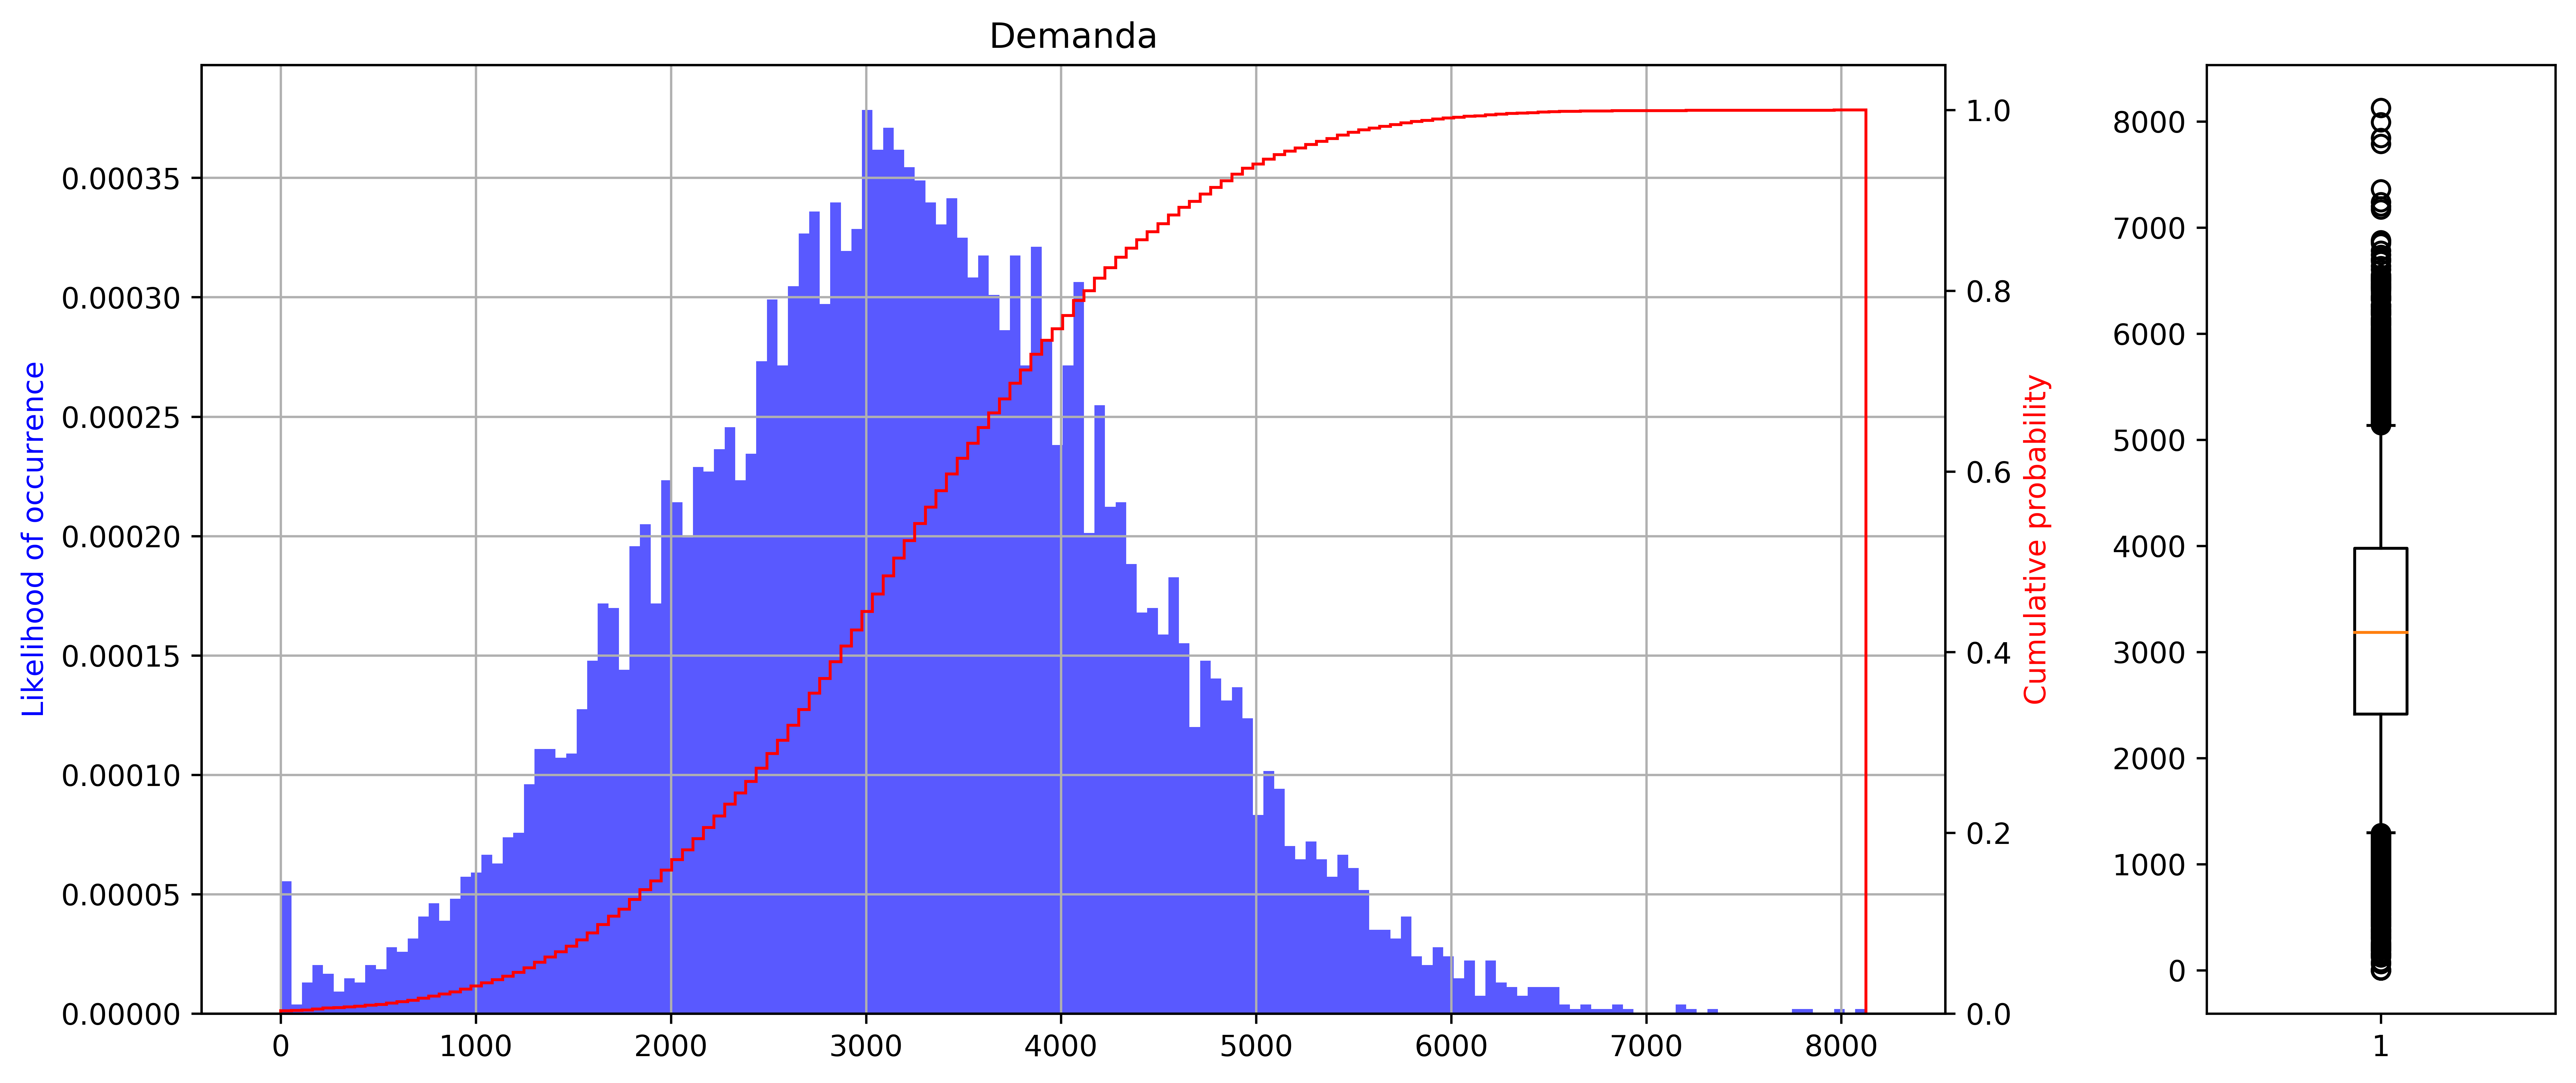

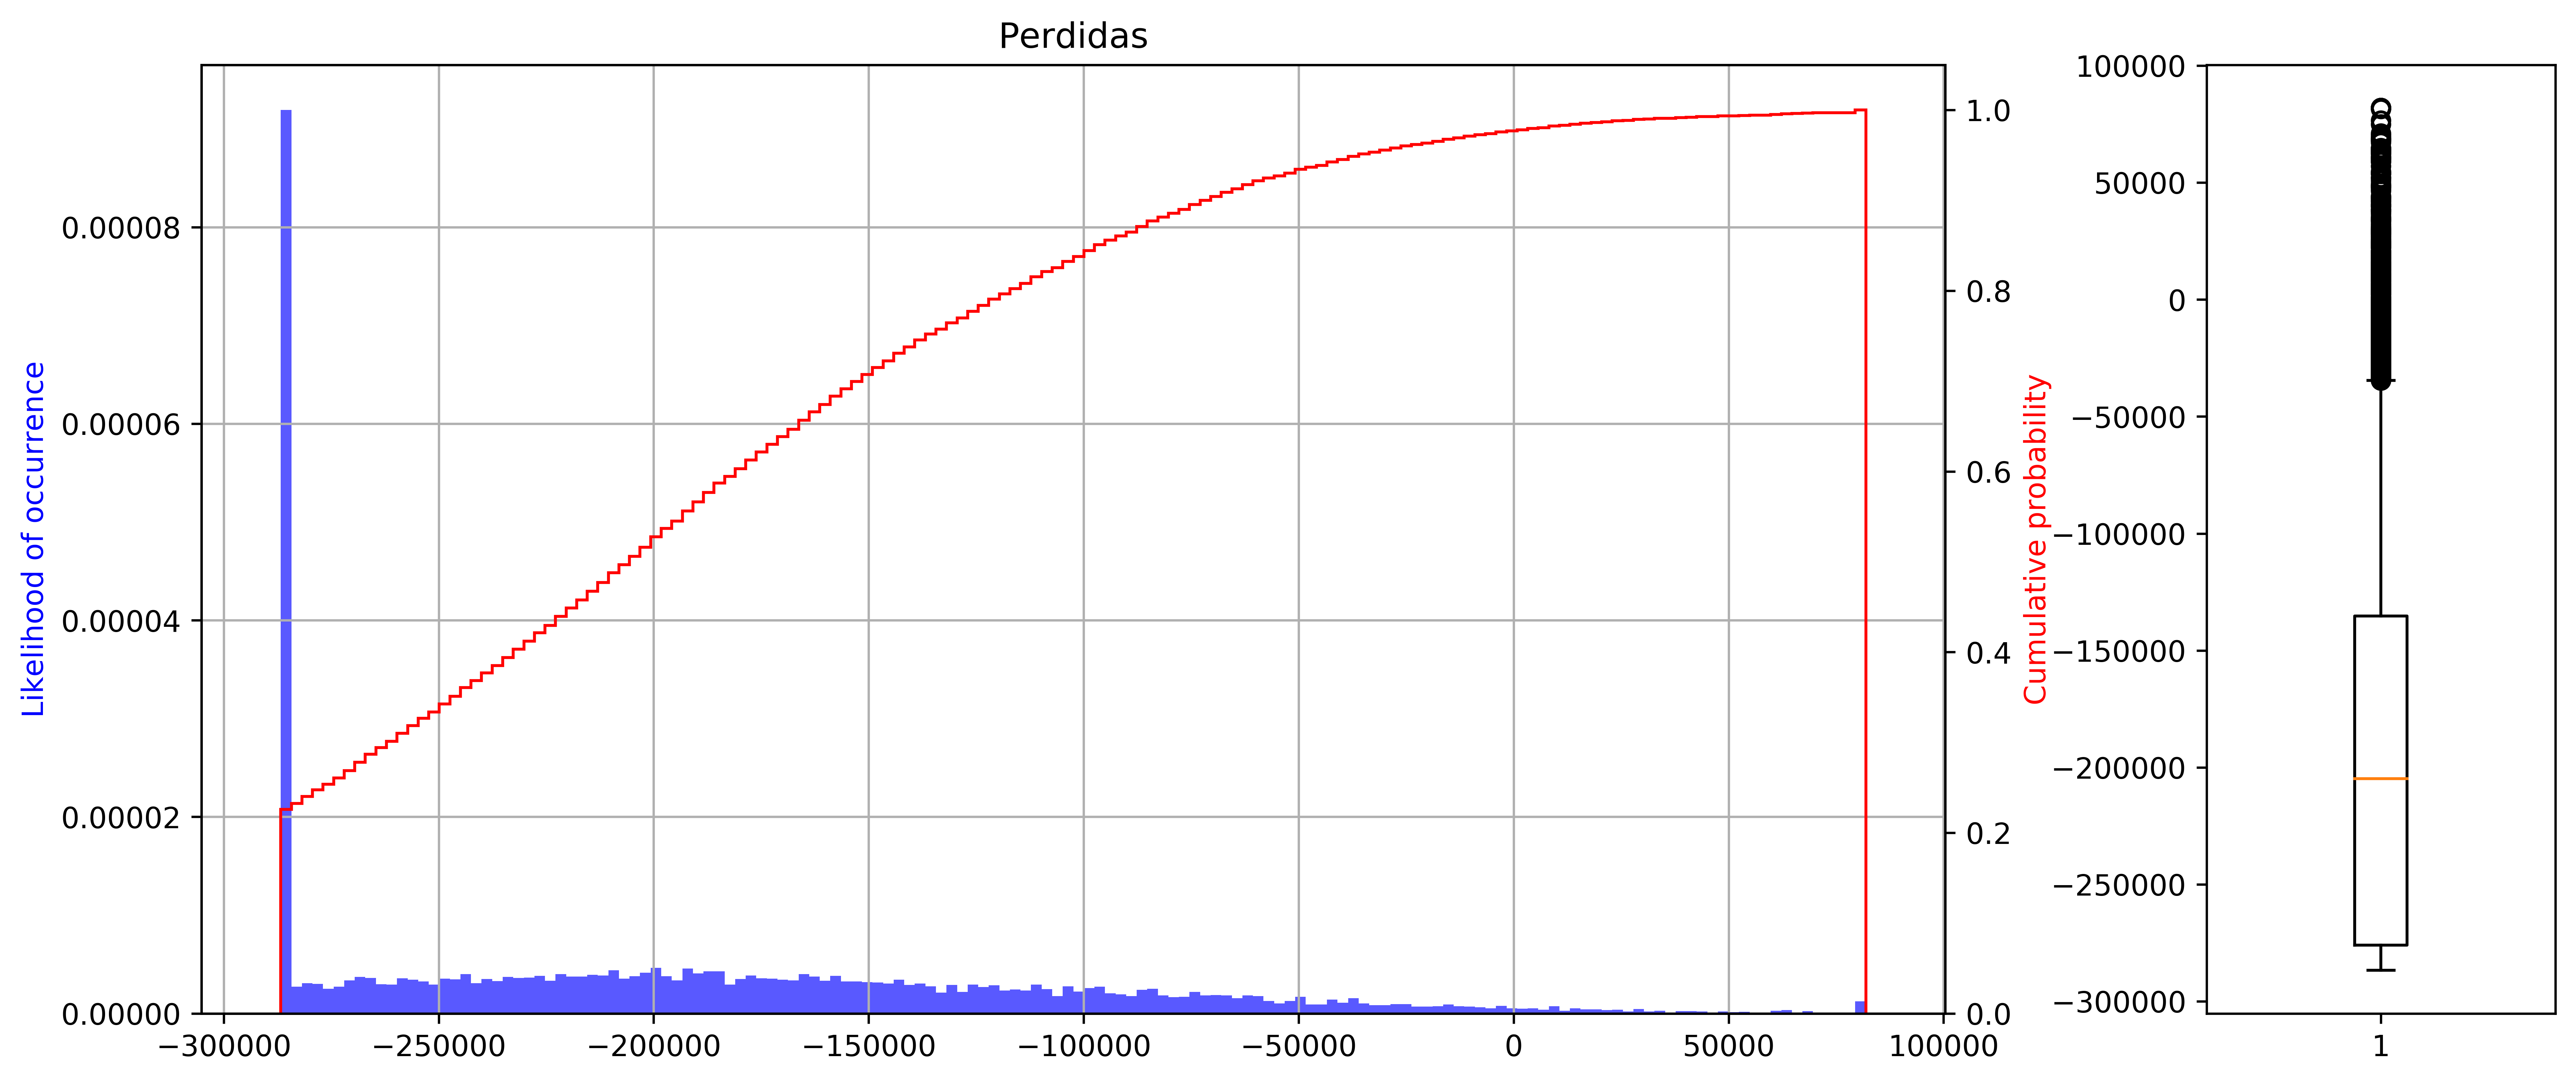

In [4]:
doubleHist(data=d,xlabel='Demanda')
doubleHist(data=losses,xlabel="Perdidas")

In [5]:
def NewsVendor(c, cs, cd, d, verbose=False):
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. d: array, demanda.
    5. verbose: bool, si es True se muestran los logs del solver

    Output
    gurobi model
    """
    
    # N: sample size
    N = len(d)
    
    model = grb.Model('SAA')
    model.setParam('OutputFlag', verbose)
    
    #variables
    y = model.addVar(name='y', vtype='C', lb=0) # y: cantidad ordenada
    xs = model.addVars(range(N), name='xs', vtype='C', lb=0)# xs: cantidad vendida a precio original
    xd = model.addVars(range(N), name='xd', vtype='C', lb=0)# xd: cantidad vendida a precio descontado
    
    #restricciones
    model.addConstrs(xs[i] <= d[i] for i in range(N)) #no puedo vender más que la demanda
    model.addConstrs(xs[i]+xd[i] == y for i in range(N)) #todo lo que se ordena se vende
    
    #función objetivo
    model.setObjective(grb.quicksum(-cs*xs[i]-cd*xd[i]+c*y for i in range(N))/N)
    
    model.optimize()
    y =  model.getVars()[0].x
    losses  = np.array([-cs*min(y, d[i]) - cd*max(0,y-d[i]) + c*y  for i in range(N)])
   
    return model, losses

In [6]:
# optimizar
model, losses = NewsVendor(c, cs, cd, d, verbose=False)
print(f"Cantidad óptima a ordenar: {model.getVars()[0].x}")
print(f"Pérdida esperada: {model.objVal}")

Academic license - for non-commercial use only
Cantidad óptima a ordenar: 4081.0
Pérdida esperada: -192268.89100003976


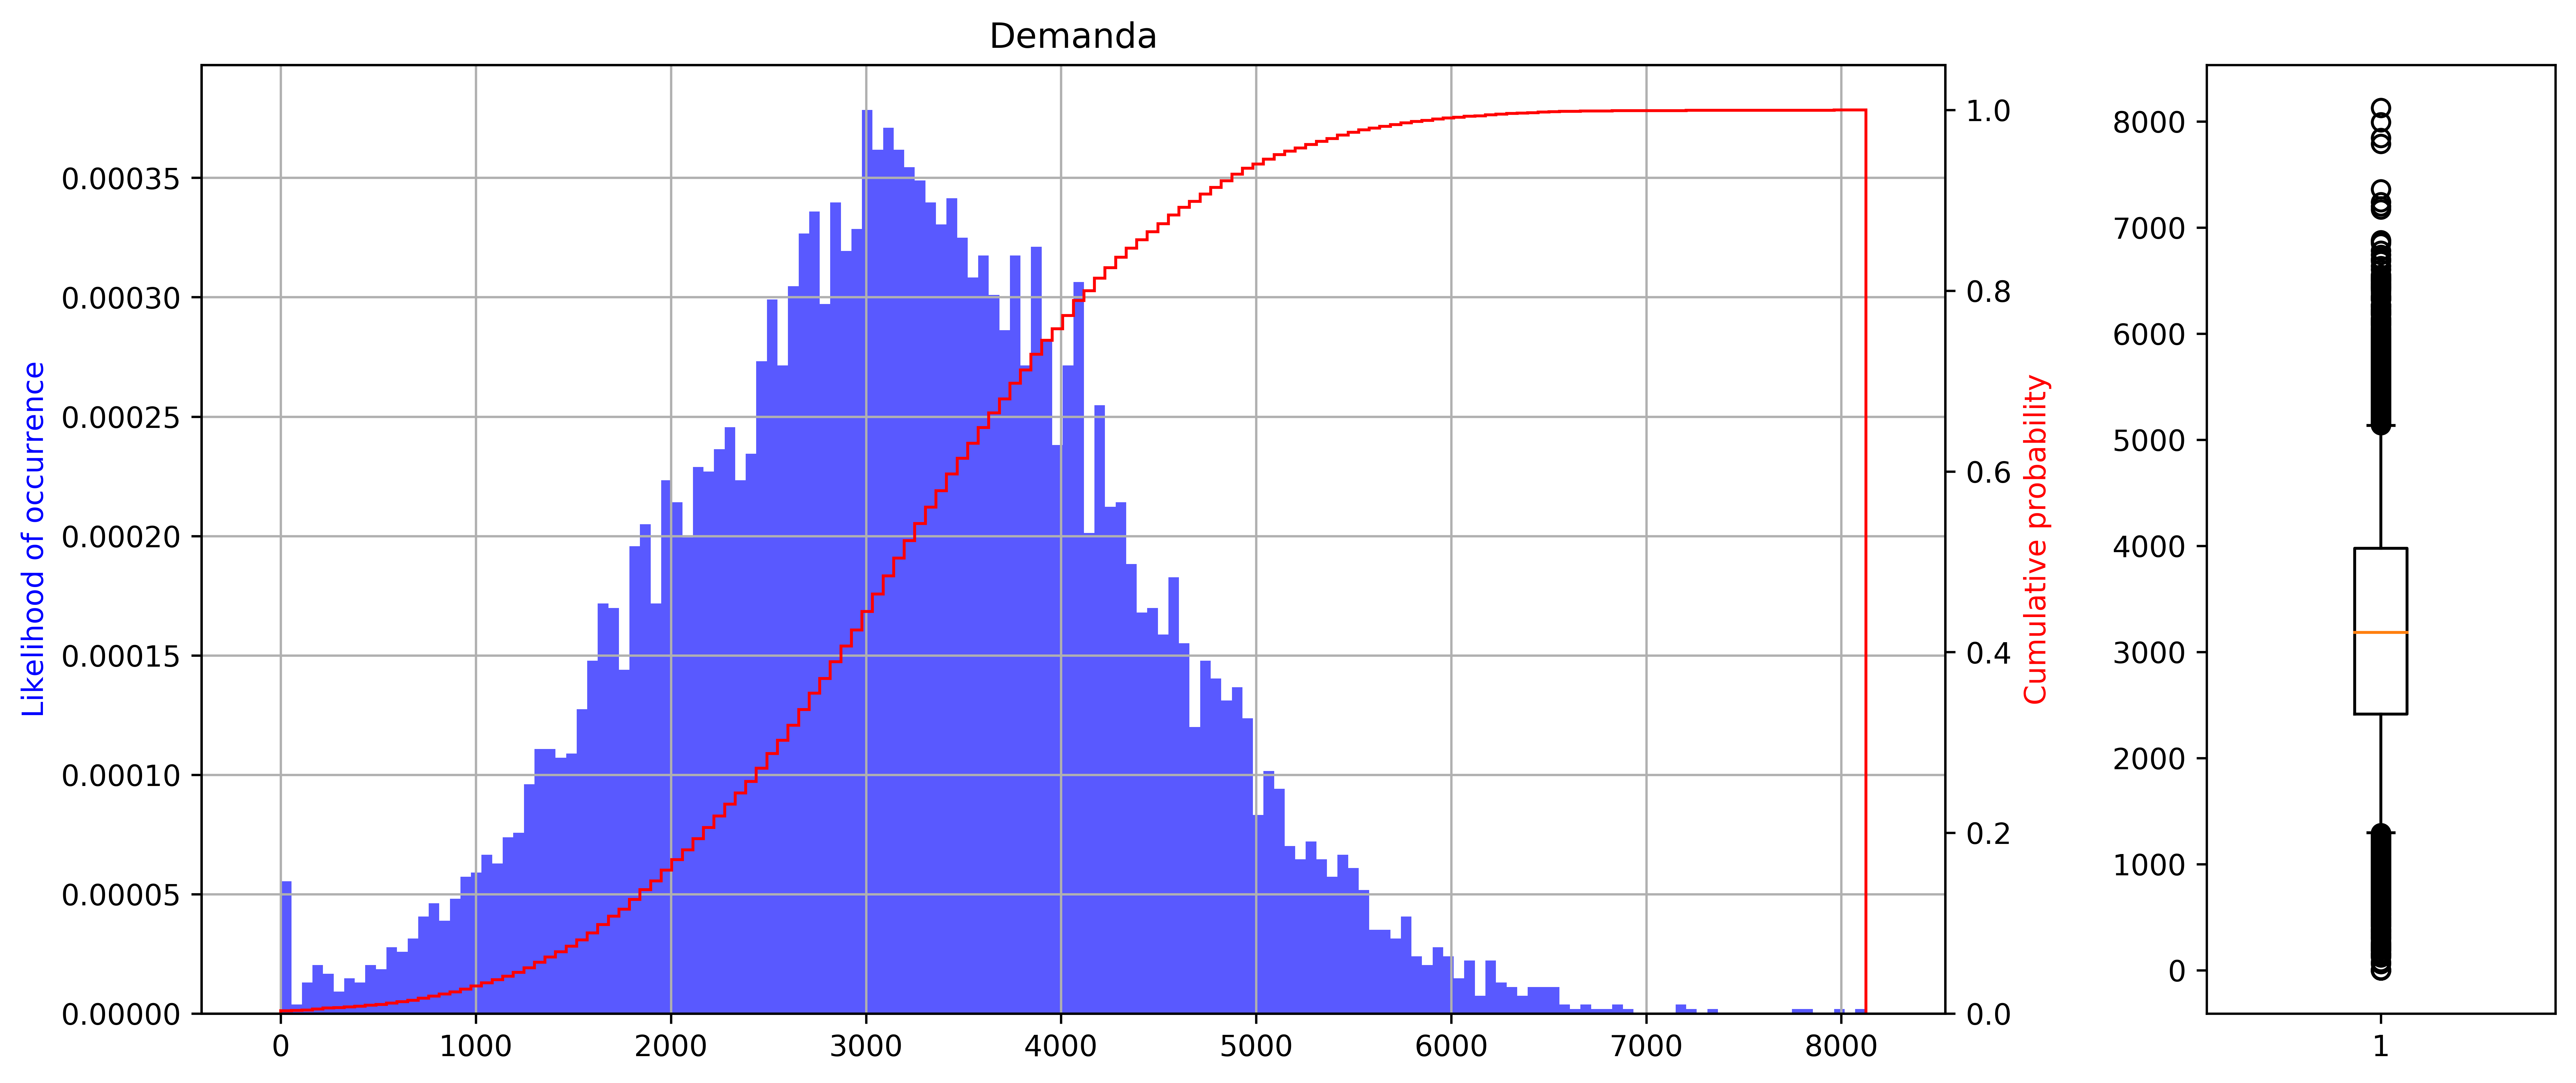

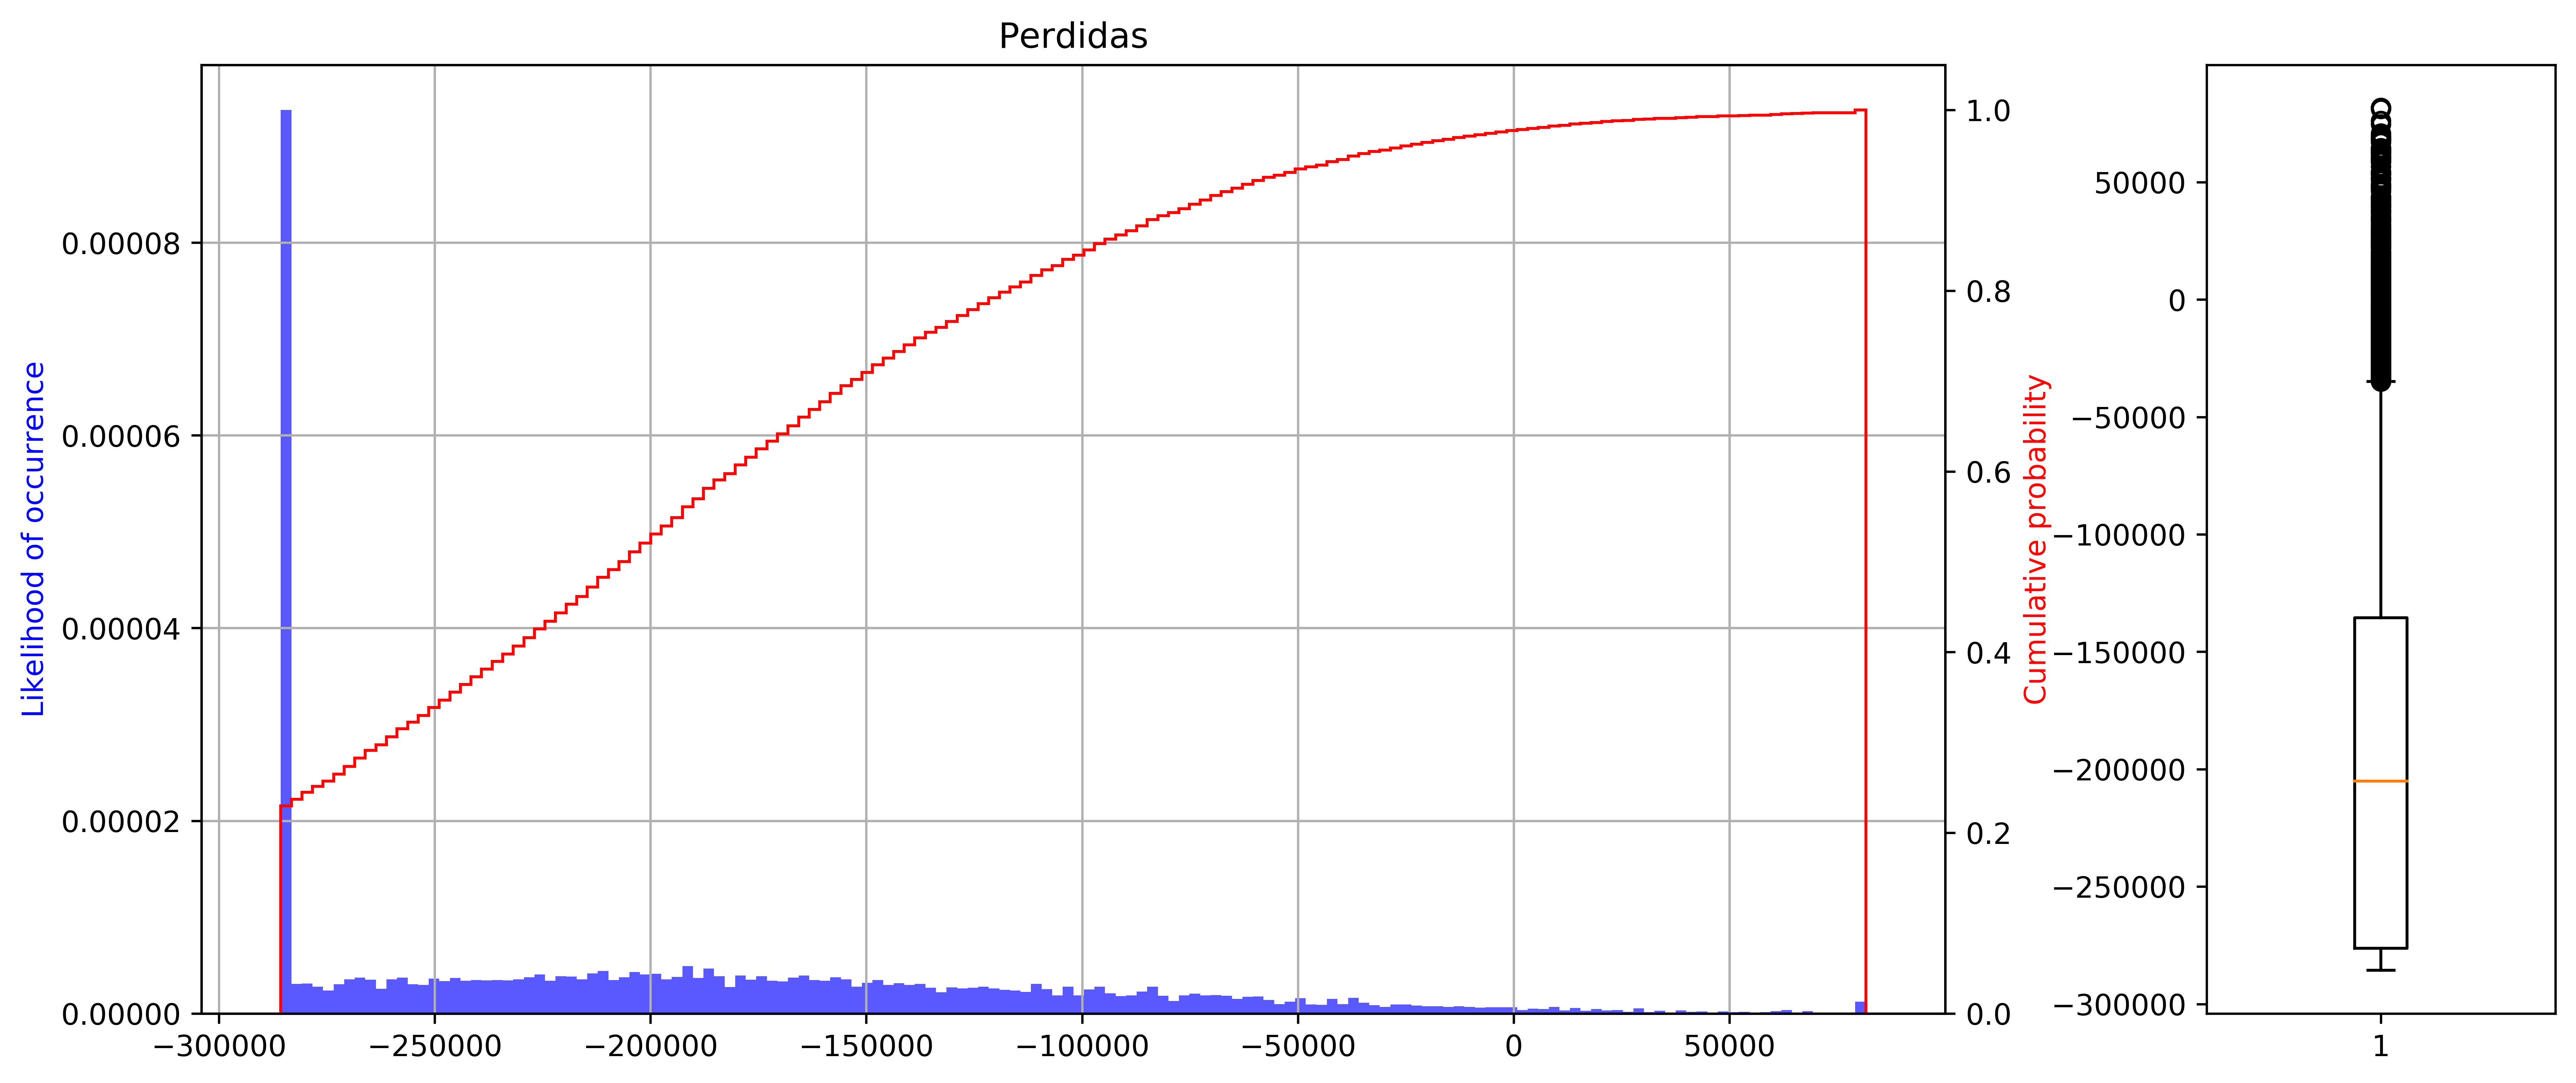

In [7]:
doubleHist(data=d,xlabel='Demanda')
doubleHist(data=losses,xlabel="Perdidas")

In [8]:
def second_stage_problem(c, cs, cd, y, d, verbose=False):
    
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. d: float, demanda.
    5. y: float, cantidad a ordenar.
    6. verbose: bool, si es True se muestran los logs del solver

    Output
    float, valor óptimo
    """
    model = grb.Model('SSP')
    model.setParam('OutputFlag', verbose)
    
    #variables
    xs = model.addVar(name='xs', vtype='C', lb=0)
    xd = model.addVar(name='xd', vtype='C', lb=0)
    
    #restricciones
    model.addConstr(xs<=d)
    model.addConstr(xs+xd==y)
    
    #función objetivo
    model.setObjective(-cs*xs-cd*xd+c*y)
    
    model.optimize()
    
    return model.objVal

In [9]:
def computing_lb(c, cs, cd, mu, sigma, N, n1, alpha, seed=0, verbose=False):
    
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. mu: float, media de la normal de la demanda.
    5. sigma: float, raiz de la varianza de la demanda.
    6. N: int, número de escenarios.
    7. n1: int, número de problemas a resolver.
    8. alpha: float, nivel de significancia estadística.
    9. seed: int, semilla aleatoria.
    10. verbose: bool, si es True se muestran los logs del solver
    
    Outputs
    1. LB: float, lower bound delta_bar-z*s
    2. interval: float, z*s
    3. y: array, cantidades a óptimas a ordenar en los n1 problemas
    """
    
    np.random.seed(seed)
    d = np.random.normal(mu, sigma, size=(N,n1))
    d[d<0]=0
    d = d.astype('int')
    y = np.zeros(n1)
    delta = np.zeros(n1)
    for i in range(n1):
        model, losses = NewsVendor(c, cs, cd, d[:, i], verbose=verbose)
        delta[i] = model.objVal    
        y[i] = model.getVars()[0].x
        
    delta_bar = delta.mean()
    s = np.sqrt(((delta-delta_bar)**2).sum()/(n1*(n1-1)))    
    z = norm.ppf(1-alpha)
    
    LB = delta_bar-z*s
    interval = z*s
    return LB, interval, y

In [10]:
def computing_ub(c, cs, cd, mu, sigma, n2, y, alpha, seed=0, verbose=False):
    
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. mu: float, media de la normal de la demanda.
    5. sigma: float, raiz de la varianza de la demanda.
    6. n2: int,  número de escenarios.
    7. y: array, soluciones óptimas de los n1 problemas.
    8. alpha: float, nivel de significancia estadística.
    9. seed: int, semilla aleatoria.
    10. verbose: bool, si es True se muestran los logs del solver
    
    Outputs
    1. UB: upper bound, best(f_bar+z*s)
    2. interval: float, s*z
    """
    np.random.seed(seed)
    n1 = len(y)
    d = np.random.normal(mu, sigma, size=n2)
    d[d<0]=0
    d = d.astype('int')
    z = norm.ppf(1-alpha)
    u = np.zeros(n1)
    confidence = np.zeros(n1)
    for i in range(n1):
        F = np.array(Parallel(n_jobs=-1)(delayed(second_stage_problem)(c, cs, cd, y[i], d[j], verbose=verbose) for j in range(n2)))  
        f = F.mean()
        s = np.sqrt(((F-f)**2).sum()/(n2*(n2-1)))    
        u[i] = f+z*s
        confidence[i] = z*s
    UB = u.min()
    interval = confidence[u.argmin()]
    return UB, interval
            

Para la generación de resultados se considerán los siguientes parámetros:

1. $\alpha = 0.05$ 
1. $N \in \{10, 50, 100, 500\}$
2. $n_{2}=10N$
3. $n_{1} \in \{5, 10, 50 , 100\}$

In [11]:
#Obtener las cotas para diferentes configuraciones

N = np.array([10, 50, 100, 500])
n1 = np.array([5, 10, 50, 100])
n2 = 10*N
alpha = 0.05
bounds = {}
bounds["N"] = N
bounds["n1"] = n1
bounds["n2"] = n2
ti = time()
for i in n1:
    bounds_i = []
    for k in N:
        LB, int_lb, y = computing_lb(c, cs, cd, mu, sigma, k, i, alpha, seed=0,  verbose=False)
        UB, int_ub = computing_ub(c, cs, cd, mu, sigma, 10*k, y, alpha, seed=0, verbose=False)
        bounds_i.append([(LB, int_lb), (UB, int_ub)])
    bounds[i] = bounds_i
tf = time()
print('Tiempo total de ejecución en minutos:', round((tf-ti)/60, 2))

Tiempo total de ejecución en minutos: 2.83


In [12]:
def bound_table(bound, opt_val):
    keys = list(bounds.keys())[1:]
    N = bounds["N"] 
    n2 = bounds["n2"] 
    n1 = bounds["n1"] 
    col = ['n1', 'n2', 'N', 'LB', 'UB', 'LB (95% conf. int.)', 'UB (95% conf. int.)', 
                                 'Gap', 'Gap %', 'Gap % LB', 'Gap % UB']
    df = pd.DataFrame(columns = col)
    list_df_to_concat = [df]
    for i in n1:
        bound_i = bound[i]
        lb = np.array([elem[0][0] for elem in bound_i]).round(2)
        ub = np.array([elem[1][0] for elem in bound_i]).round(2)
        interval_lb = np.array([elem[0][1] for elem in bound_i]).round(2)
        interval_ub = np.array([elem[1][1] for elem in bound_i]).round(2)
        mean_lb = np.array([lb[i]+interval_lb[i] for i in range(len(N))]).round(2)
        mean_ub = np.array([ub[i]-interval_ub[i] for i in range(len(N))]).round(2)
        lb_conf = [str(mean_lb[i])+'+/-'+str(interval_lb[i]) for i in range(len(N))]
        ub_conf = [str(mean_ub[i])+'+/-'+str(interval_ub[i]) for i in range(len(N))]
        gap = [(mean_ub[i]+interval_ub[i])-(mean_lb[i]-interval_lb[i]) for i in range(len(N))]
        gap_p = np.abs(100*np.array(gap/opt_val)).round(2)
        gap_p_lb = np.abs(100*np.array((lb-opt_val)/opt_val)).round(2)
        gap_p_ub = np.abs(100*np.array((opt_val-ub)/opt_val)).round(2)

        df_to_concat = pd.DataFrame({'n1':[i]*len(N), 'n2': n2, 'N':N, 'LB':lb, 'UB':ub,
                                     'LB (95% conf. int.)':lb_conf, 'UB (95% conf. int.)':ub_conf,
                                    'Gap':gap, 'Gap %': gap_p, 'Gap % LB': gap_p_lb, 'Gap % UB': gap_p_ub})
        list_df_to_concat.append(df_to_concat)
            
    df =  pd.concat(list_df_to_concat)           
    return df

In [13]:
df_bound = bound_table(bounds, opt_val)
df_bound

n1    n2    N         LB         UB   LB (95% conf. int.)  \
0    5   100   10 -224013.62 -181045.97  -202788.6+/-21225.02   
1    5   500   50 -202385.55 -183218.65  -193709.08+/-8676.47   
2    5  1000  100 -196231.54 -183703.35   -189670.24+/-6561.3   
3    5  5000  500 -192563.78 -188950.45  -190874.19+/-1689.59   
0   10   100   10 -215032.95 -181362.59  -197949.1+/-17083.85   
1   10   500   50 -197846.04 -183222.67   -189889.04+/-7957.0   
2   10  1000  100 -193809.75 -183711.57  -188297.93+/-5511.82   
3   10  5000  500 -193460.40 -188952.71  -190963.74+/-2496.66   
0   50   100   10 -198050.42 -181479.84  -191861.46+/-6188.96   
1   50   500   50 -194403.63 -183222.37  -191413.86+/-2989.77   
2   50  1000  100 -193543.47 -183714.03   -191239.5+/-2303.97   
3   50  5000  500 -192955.75 -188952.91    -191980.85+/-974.9   
0  100   100   10 -195935.48 -181478.80  -191356.41+/-4579.07   
1  100   500   50 -193550.33 -183222.60  -191509.41+/-2040.92   
2  100  1000  100 -192494.18 -183714.12  -190906.04+/-1588.14   
3  100  5000  500 -192484.17 -188952.95   -191841.56+/-642.61   

    UB (95% conf. int.)       Gap  Gap %  Gap % LB  Gap % UB  
0  -195489.0+/-14443.03  42967.65  22.40     16.80      5.60  
1  -189414.04+/-6195.39  19166.90   9.99      5.53      4.47  
2   -188074.2+/-4370.85  12528.19   6.53      2.32      4.21  
3  -190903.09+/-1952.64   3613.33   1.88      0.41      1.48  
0  -195417.6+/-14055.01  33670.36  17.56     12.12      5.44  
1   -189454.3+/-6231.63  14623.37   7.62      3.16      4.47  
2   -188067.17+/-4355.6  10098.18   5.27      1.05      4.21  
3   -190917.4+/-1964.69   4507.69   2.35      0.87      1.48  
0  -195201.3+/-13721.46  16570.58   8.64      3.27      5.37  
1   -189431.7+/-6209.33  11181.26   5.83      1.36      4.47  
2   -188049.33+/-4335.3   9829.44   5.13      0.92      4.21  
3  -190916.03+/-1963.12   4002.84   2.09      0.61      1.48  
0   -195162.6+/-13683.8  14456.68   7.54      2.16      5.37  
1  -189433.66+/-6211.06  10327.73   5.39      0.92      4.47  
2  -188057.83+/-4343.71   8780.06   4.58      0.37      4.21  
3   -190915.55+/-1962.6   3531.22   1.84      0.36      1.48

In [14]:
fig = go.Figure()
fig.update_layout(template="plotly_white", 
                  title = 'Lower and Upper bound convergence',
                  xaxis_title = "N",
                  yaxis_title = "losses")
fig.add_trace(go.Scatter(x=[N[0], N[-1]], y=[opt_val, opt_val], name="optimum",
                             mode = "lines",
                             line = dict(color="gray", width=4, dash="dot")))

style = [None, "dash", "dashdot", "dot"]
for i, n in enumerate(n1):
    lb = df_bound[df_bound["n1"]==n]["LB"]
    ub = df_bound[df_bound["n1"]==n]["UB"]
    name = f"n1={n}"
    fig.add_trace(go.Scatter(x=N, y=lb, name=name,
                             mode="lines",
                             line = dict(color="firebrick", width=2,  dash = style[i])))
    fig.add_trace(go.Scatter(x=N, y=ub, name = name,
                             mode="lines",
                             line=dict(color="royalblue", width=2,  dash = style[i])))
fig.show()

Las cotas superiores para diferentes n1 son muy similares y mejora al aumentar $n_{1}$, aunque no de manera significativa.

Las cotas inferiores si mejoran significativamente al incrementar $n_{1}$

# Convergencia a soluciones óptimas

Se tiene que para tamaño de muestro fijo ($N$) al incrementar el número de repeticiones ($n_{1}$) la cota inferior siempre mejora y esto es más notorio para los problemas de menor tamaño (menor $N$), por ejemplo, para $N=100$ con $n_{1}$=5 se tiene que el gap de la cota inferior es del 16.8% y para $n_{1}=50$ es del 3.27%. El resultado anterior se condice con el hecho de que al aumentar el $n_{1}$ el problema de tamaño $N$ se resuelve más veces incrementando así la probabilidad de encontrar mejores valores óptimos, así las malas instancias que podrían obtenerse al resolver el problema por pocas repeticiones pesarán menos en el global.

Similarmente al matener fijo el número de repeticiones al aumentar el $N$ la cota inferior siempre mejora y esto es más notorio para un menor número de repeticiones, por ejemplo, para $n_{1}=10$ con $N=10$ se tiene un gap de la cota inferior del 16.8% y para $N=50$ del 5.53%. El resultado anterior concide con el hecho de a mayor es el tamaño del problema el valor objetivo del problema sampleado más se acerca al valor objetivo del problema original ya que mejora la estimación de montecarlo de la esperanza de la función objetivo.

Es importante destacar que con un bajo número de repeticiones y muestreo, por ejemplo, $n_{1}=5$ y $N=50$ es posible alcanzar un 5.53% de gap en la cota inferior, lo que es bastante aceptable, incrementando el $N$ a 100 estamos a un 2.32% y con 500 estamos por debajo del 1% (0.43%), luego aumentar el $N$ o el $n_{1}$ más allá ya no genera mejoras significativas.

Respecto a $n_{2}$ se observa que su incremento mejora la cota superior, lo que tiene sentido ya que la estimación por montecarlo de la función objetivo ($\mathbb{E}[F(x, \xi)]$) más a la esperanza de $F(x, \xi)$ y la varianza de la estimación decrece. Aumentar el número de repeticiones favorece a la cota superior debido a que esta corresponde al mínimo de las cotas superiores para las $n_{1}$ soluciones, por tanto, si se tienen más soluciones candidatas hay más posibilidades de encontrar un mejor candidato de cota superior. Al igual que el número de repeteciciones incrementar $N$ también tiene un efecto positivo en esta cota, ya que al incrementarlo se obtienen soluciones más cercanas a la solución óptima por lo que al evaluar la función objetivo (o más bien nuestra aproximación de esta) se obtiene una cota más apretada. 

Es importante destacar que para el caso base $n_{1}=5$, $N=10$ y $n2=100$ ya se alcanza un gap superior de casi el 5% (5.60%) lo que es bueno ya que el cálculo de esta cota es bastante sencillo, sin embargo, esta cota mejora lentamente a partir de este punto con el incremento de parámetros, siendo $n_{2}$ el parámetro de mayor incidencia, teniéndose que para $n_{2}=5000$ se llega a un gap superior del 1.48%, por lo que si deseamos una cota superior lo más apretada posible la cantidad de iteraciones se dispara incluso más que en la cota inferior.

In [15]:
def expected_losses(c, cs, cd, y, mu, sigma):
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. mu: float, media de la normal de la demanda.
    5. sigma: float, raiz de la varianza de la demanda.
    6. y: float, cantidad a ordenar.
    
    Output
    float, Pérdidas esperadas dado una cantidad fija a ordenar
    """
    losses  = (cs-cd)*((y-mu)*norm.cdf((y-mu)/sigma)+sigma**2*norm.pdf(y, mu, sigma))+y*(c-cs)
    return losses

In [16]:
def epsilon_optimal_probability(c, cs, cd, y, mu, sigma, opt_val, d):
    """
    Inputs
    1. c: float, costo de ordenar un producto.
    2. cs: float, precio de venta original.
    3. cd: float, precio de venta descontada o salvataje. 
    4. mu: float, media de la normal de la demanda.
    5. sigma: float, raiz de la varianza de la demanda.
    6. y: float, cantidad a ordenar.
    7. opt_val: float, valor óptimo de la formula cerrada.
    8. d: float, tolerancia relativa, epsilon=-d*opt_val, d en [0,1].
    
    epsilon = d*opt_val
    
    Output
    float, Probabilidad de que el valor objetivo de una solución obtenida por SAA con  𝑁  samples este a epsilon
    del valor objetivo del problema original. 
    """
    losses = np.array([expected_losses(c, cs, cd, y[i], mu, sigma) for i in range(len(y))])
    delta = losses-opt_val
    epsilon = -d*opt_val
    proba = len(delta[delta<=epsilon])/len(delta)
    return proba

In [17]:
N = list(range(10, 110, 10))
n1 = 1000
solutions = {}

ti = time()
for k in range(len(N)):
    LB, int_lb, y = computing_lb(c, cs, cd, mu, sigma, N[k], n1, alpha, seed=0,  verbose=False)
    solutions[(n1, N[k])]  = y
    print('Iteración (n1={n1}, N={N}) términada'.format(n1=n1, N=N[k]))
tf = time()
print('Tiempo total de ejecución en minutos:', round((tf-ti)/60, 2))

Iteración (n1=1000, N=10) términada
Iteración (n1=1000, N=20) términada
Iteración (n1=1000, N=30) términada
Iteración (n1=1000, N=40) términada
Iteración (n1=1000, N=50) términada
Iteración (n1=1000, N=60) términada
Iteración (n1=1000, N=70) términada
Iteración (n1=1000, N=80) términada
Iteración (n1=1000, N=90) términada
Iteración (n1=1000, N=100) términada
Tiempo total de ejecución en minutos: 0.66


In [18]:
#tolerancias desde el 10% al 0%
d=[0.1, 0.05, 0.04, 0.03, 0.02, 0.01, 0.001]
proba_d = {}
for i in range(len(d)):
    probabilities = []
    for k in range(len(N)):
        y = solutions[(1000, N[k])]
        proba_d_N = epsilon_optimal_probability(c, cs, cd, y, mu, sigma, opt_val, d[i])
        probabilities.append(proba_d_N)
    proba_d[d[i]]=probabilities

In [19]:
# N:filas, d:columnas
pd.DataFrame(proba_d, index=N)

0.100  0.050  0.040  0.030  0.020  0.010  0.001
10   0.988  0.908  0.877  0.825  0.723  0.579  0.204
20   1.000  0.986  0.973  0.955  0.884  0.734  0.289
30   1.000  0.999  0.996  0.983  0.952  0.837  0.339
40   1.000  0.998  0.997  0.989  0.978  0.890  0.391
50   1.000  0.998  0.998  0.994  0.985  0.923  0.426
60   1.000  1.000  1.000  0.998  0.991  0.945  0.444
70   1.000  1.000  1.000  0.999  0.995  0.965  0.479
80   1.000  1.000  1.000  0.999  0.998  0.976  0.513
90   1.000  1.000  1.000  0.999  0.997  0.984  0.550
100  1.000  1.000  1.000  0.999  0.999  0.982  0.583

In [20]:
fig = go.Figure()
fig.update_layout(template="plotly_white", 
                  title = "Epsilon-Optimal solutions",
                  xaxis_title = "N",
                  yaxis_title = "probability")
for i in range(len(d)):
    name = f'd={d[i]*100}%'
    fig.add_trace(go.Scatter(x=N, y=proba_d[d[i]], name=name,
                             mode="lines+markers"))

fig.show()

In [21]:
N = [10, 50, 100, 500, 1000, 5000]
n1 = 1000
solutions = {}
ti = time()
for k in range(len(N)):
    LB, int_lb, y = computing_lb(c, cs, cd, mu, sigma, N[k], n1, alpha, seed=1,  verbose=False)
    solutions[(n1, N[k])]  = y
    print('Iteración (n1={n1}, N={N}) términada'.format(n1=n1, N=N[k]))
tf = time()
print('Tiempo total de ejecución en minutos:', round((tf-ti)/60, 2))

Iteración (n1=1000, N=10) términada
Iteración (n1=1000, N=50) términada
Iteración (n1=1000, N=100) términada
Iteración (n1=1000, N=500) términada
Iteración (n1=1000, N=1000) términada
Iteración (n1=1000, N=5000) términada
Tiempo total de ejecución en minutos: 7.28


In [22]:
#tolerancia al 0.1%
d=0.001
proba_d = {}
probabilities = []
for k in range(len(N)):
    y = solutions[(1000, N[k])]
    proba_d_N = epsilon_optimal_probability(c, cs, cd, y, mu, sigma, opt_val, d)
    probabilities.append(proba_d_N)

In [23]:
fig = go.Figure()
fig.update_layout(template="plotly_white", 
                  title = 'Epsilon-Optimal solutions',
                  xaxis_title = "N",
                  yaxis_title = "probability")

name = f'd={d}'
fig.add_trace(go.Scatter(x=N, y=probabilities, name=name,
                         mode="lines+markers"))
fig.show()

# Convergencia a soluciones epsilon óptimas 

El experimento anterior toma $n_{1}=1000$ con el objetivo de que la estimación de la probabilidad de que el valor óptimo ($\delta$) del problema sampleado este a epsilon del valor óptimo del problema original se parezca a la probabilidad real y la varianza de la estimación sea menor. El parámetro $d$ es la tolerancia y $\epsilon=-d\delta$ , por tanto si $d=0.1$ la probabilidad a estimar viene dada por la fracción de soluciones que están a un 10% o menos del valor óptimo.

De los resultados observamos que con tamaño de muestreo $N=10$ la probabilidad de estar a un 10% del valor óptimo es de casi del 99%, para una tolerancia del 5% la probabilidad es de casi el 91% y para una tolerancia del 1% la probabilidad es del 58%, por ende si estamos dispuesto a estar a lo más a un 5% lejos del valor óptimo un tamaño de muestreo igual a 10 parece razonable, si queremos confiar más en esta probabilidad con un tamaño de muestro de 20 la probabilidad sube a 98.6%. Si se quiere una tolerancia del 1% y con una probabilidad del 95% basta con un tamaño de muestreo de 60, por lo que para el problema ingenieril este tamaño de muestro es bastante aceptable, ya que no necesitamos samplear mucho y estamos a lo más a un 1% del óptimo con una probabilidad del 95%. Por último, si se quiere estar a una tolerancia del 0.1% del óptimo y con una probabilidad del 99% es necesario tener un tamaño de muestreo igual a 1000. 

Los resultados encontrados muestran que si sequiere tener un gap aceptable entre el valor óptimo encontrado y el valo óptimo real basta con un tamaño de muestreo pequeño o mediano si se quiere estar a un 1% de tolerancia, ahora bien si se quiere que la diferencia sea prácticamente cero el tamaño de muestreo requerido se dispara. Para la mayoría de los problemas de ingeniería obtener un resultado un epsilon mejor incrementando el costo computacional que requiere llegar a ese resultado genera un beneficio poco significativo, también se debe tener presente que los modelos son simplificaciones de la realidad y esas simplificaciones generan un gap entre el valor óptimo de resolver el problema de optimización de forma exacta y la realidad, siendo este gap mucho más significativo que el gap obtenido con una tolerancia aceptable.

# Referencias:

[1] Shapiro, A., & Philpott, A. (2007). A tutorial on stochastic programming. Manuscript. Available at www2. isye. gatech. edu/ashapiro/publications. html, 17.

[2] Kleywegt, A. J., Shapiro, A., & Homem-de-Mello, T. (2002). The sample average approximation method for stochastic discrete optimization. SIAM Journal on Optimization, 12(2), 479-502.

[3] Webinar: Solving Simple Stochastic Optimization Problems with Gurobi, https://www.gurobi.com/resource/solving-simple-stochastic-optimization-problems-with-gurobi/ 


